# 2015 Flights delays and cancellations

### 1. Introduction

The aim of this notebook is to perform exploratory data analysis on the flights delay data to get insights on the features and to build models using Linear regression to analyze arrival delay of flights using several features.

In [1]:
#importing all the relevant libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
#Reading the csv file
flight=pd.read_csv("flights.csv")

### 2. Description of the dataset

YEAR :Year of the Flight Trip<br/>
MONTH : Month of the Flight Trip<br/>
DAY : Day of the Flight Trip<br/>
DAY_OF_WEEK : Day of week of the Flight Trip<br/>
AIRLINE : Airline Identifier<br/>
FLIGHT_NUMBER : Flight Identifier<br/>
TAIL_NUMBER : Aircraft Identifier<br/>
ORIGIN_AIRPORT : Starting Airport<br/>
DESTINATION_AIRPORT : Destination Airport<br/>
SCHEDULED_DEPARTURE : Planned Departure Time<br/>
DEPARTURE_TIME : WHEEL_OFF - TAXI_OUT<br/>
DEPARTURE_DELAY : Total Delay on Departure<br/>
TAXI_OUT : The time duration elapsed between departure from the origin airport gate and wheels off<br/>
WHEELS_OFF : The time point that the aircraft's wheels leave the ground<br/>
SCHEDULED_TIME : Planned time amount needed for the flight trip<br/>
ELAPSED_TIME : AIR_TIME+TAXI_IN+TAXI_OUT<br/>
AIR_TIME : The time duration between wheels_off and wheels_on time<br/>
DISTANCE : Distance between two airports<br/>
WHEELS_ON : The time point that the aircraft's wheels touch on the ground<br/>
TAXI_IN : The time duration elapsed between wheels-on and gate arrival at the destination airport<br/>
SCHEDULED_ARRIVAL : Planned arrival time<br/>
ARRIVAL_TIME : WHEELS_ON+TAXI_IN<br/>
ARRIVAL_DELAY : ARRIVAL_TIME-SCHEDULED_ARRIVAL<br/>
DIVERTED: Aircraft landed on airport that out of schedule<br/>
CANCELLED : Flight Cancelled (1 = cancelled)<br/>
CANCELLATION_REASON: Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security<br/>
AIR_SYSTEM_DELAY : Delay caused by air system<br/>
SECURITY_DELAY : Delay caused by security<br/>
AIRLINE_DELAY : Delay caused by the airline<br/>
LATE_AIRCRAFT_DELAY : Delay caused by aircraft<br/>
WEATHER_DELAY : Delay caused by weather<br/>

In [2]:
#Top 5 rows of the dataset
flight.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,EV,4160,N11150,JAX,EWR,540,...,743.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,1635,N025AA,ATL,DFW,625,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,119,N271LV,RSW,ATL,800,...,934.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,EV,4936,N738EV,MSP,IAD,900,...,1240.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,DL,2319,N960DL,LGA,MSP,1010,...,1225.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Bottom 5 rows of the dataset
flight.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5816,2015,12,31,4,UA,436,N69838,IAD,TPA,1230,...,1448.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5817,2015,12,31,4,WN,2265,N626SW,TUL,LAS,1345,...,1523.0,38.0,0,0,NaN,0.0,0.0,8.0,30.0,0.0
5818,2015,12,31,4,MQ,3083,N513MQ,STL,ORD,1358,...,1525.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819,2015,12,31,4,EV,2775,N624AE,SPI,DFW,1411,...,1605.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5820,2015,12,31,4,WN,3479,N719SW,CMH,PHX,1450,...,1734.0,19.0,0,0,NaN,19.0,0.0,0.0,0.0,0.0


In [4]:
#Number of observations
print("Total No. of observations : {}".format(len(flight)))

Total No. of observations : 5821


In [5]:
#The number of features/columns
print("Total No. of features : {}".format(len(flight.columns)))

Total No. of features : 31


In [6]:
#Names of columns
for col in flight.columns:
    print(col)

YEAR
MONTH
DAY
DAY_OF_WEEK
AIRLINE
FLIGHT_NUMBER
TAIL_NUMBER
ORIGIN_AIRPORT
DESTINATION_AIRPORT
SCHEDULED_DEPARTURE
DEPARTURE_TIME
DEPARTURE_DELAY
TAXI_OUT
WHEELS_OFF
SCHEDULED_TIME
ELAPSED_TIME
AIR_TIME
DISTANCE
WHEELS_ON
TAXI_IN
SCHEDULED_ARRIVAL
ARRIVAL_TIME
ARRIVAL_DELAY
DIVERTED
CANCELLED
CANCELLATION_REASON
AIR_SYSTEM_DELAY
SECURITY_DELAY
AIRLINE_DELAY
LATE_AIRCRAFT_DELAY
WEATHER_DELAY


In [7]:
#Information about the columns, type and the not null values
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 31 columns):
YEAR                   5821 non-null int64
MONTH                  5821 non-null int64
DAY                    5821 non-null int64
DAY_OF_WEEK            5821 non-null int64
AIRLINE                5821 non-null object
FLIGHT_NUMBER          5821 non-null int64
TAIL_NUMBER            5805 non-null object
ORIGIN_AIRPORT         5821 non-null object
DESTINATION_AIRPORT    5821 non-null object
SCHEDULED_DEPARTURE    5821 non-null int64
DEPARTURE_TIME         5730 non-null float64
DEPARTURE_DELAY        5730 non-null float64
TAXI_OUT               5728 non-null float64
WHEELS_OFF             5728 non-null float64
SCHEDULED_TIME         5821 non-null int64
ELAPSED_TIME           5713 non-null float64
AIR_TIME               5713 non-null float64
DISTANCE               5821 non-null int64
WHEELS_ON              5727 non-null float64
TAXI_IN                5727 non-null float64
SCHEDULED_ARR

### 3. Part I : Exploratory Analysis

We perform EDA to investigate patterns, correlation on our dataset. Our main focus is about Arrival and Departure delays. We compare different features to gain insights on the factors responsible for arrival and departure delays. The analysis is limited to the range and variables in the dataset.

#### 3.1. Departure and arrival delay

In [8]:
# Missing values in departure and arrival delays
print("The missing values in departure delays: {}" .format(flight['DEPARTURE_DELAY'].isnull().sum()))
print("The missing values in Arrival delays: {}" .format(flight['ARRIVAL_DELAY'].isnull().sum()))

The missing values in departure delays: 91
The missing values in Arrival delays: 108


In [9]:
#Top 10 values where the arrival and departure delays are missing
flight[(flight['ARRIVAL_DELAY'].isnull()) | (flight['DEPARTURE_DELAY'].isnull()) ][['ARRIVAL_DELAY','ARRIVAL_TIME','DEPARTURE_DELAY','DEPARTURE_TIME']].head(10)

,ARRIVAL_DELAY,ARRIVAL_TIME,DEPARTURE_DELAY,DEPARTURE_TIME
1,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN
174,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN
350,NaN,NaN,31.0,1221.0
359,NaN,NaN,NaN,NaN


The missing values of both correspond to the same observations. The departure and arrival time is also a missing value for the corresponding missing departure and arrival delays in most cases. We can assume that the arrival delays have more missing values than departure delay because- (1) It could be the first time the flight is flying, hence no prior commercial arrival (2) Or simply that entry was missed. It is hard to know for sure without more information.. Hence, we shall drop the missing values from departure and arrival delay from our dataset. 

In [10]:
#Dropping the null values in departure and arrival delay
flight.dropna(subset=['DEPARTURE_DELAY','ARRIVAL_DELAY'],inplace=True)


In [11]:
#Total number of observations after dropping the null values of departure and arrival delay
len(flight)

5713

In [12]:
# The current number of missing values in departyure and arrival delays
print("The missing values in departure delays: {}" .format(flight['DEPARTURE_DELAY'].isnull().sum()))
print("The missing values in Arrival delays: {}" .format(flight['ARRIVAL_DELAY'].isnull().sum()))

The missing values in departure delays: 0
The missing values in Arrival delays: 0


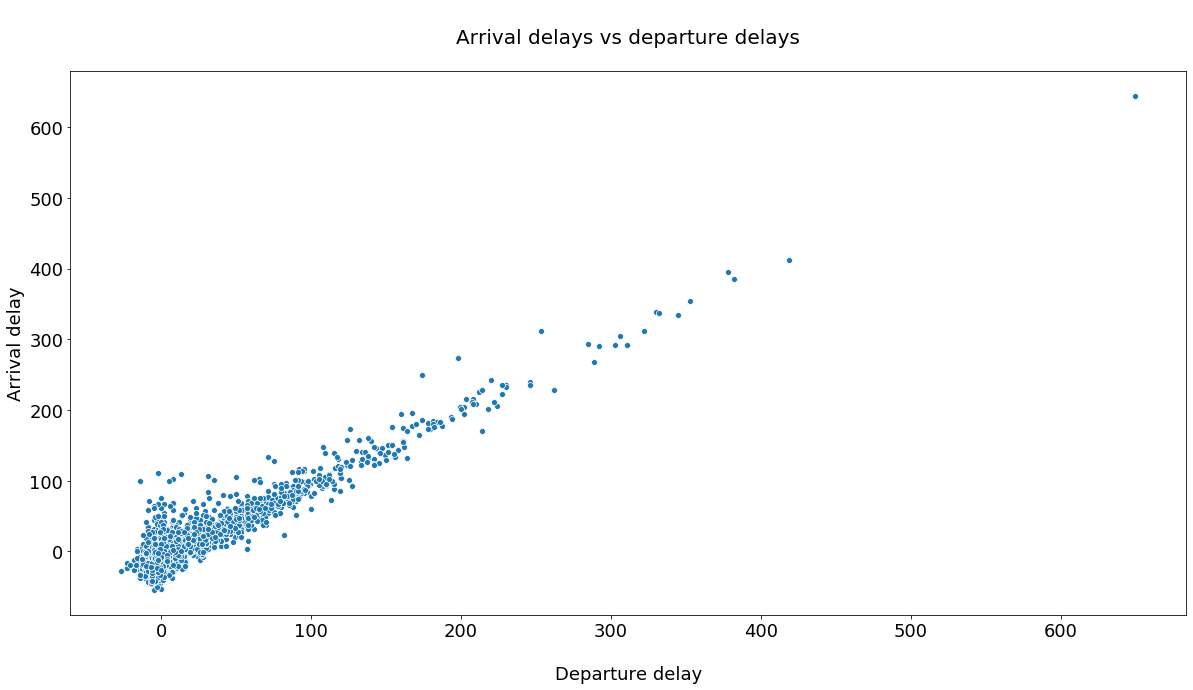

In [13]:
#Scatter plot between arrival and departure delay
plt.figure(figsize=(20,10))
sns.scatterplot(x="DEPARTURE_DELAY",y="ARRIVAL_DELAY",data=flight)
plt.xlabel("\nDeparture delay" ,fontsize=18)
plt.ylabel("Arrival delay" ,fontsize=18)
plt.title("\nArrival delays vs departure delays\n",fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

There is a somewhat linear relationship between arrrival delay and departure delay.Which means, the flights that depart late would arrive late and viceversa

In [14]:
# Mean and median of arrival and departure delay
print("Average departure delay : {} " .format(flight['DEPARTURE_DELAY'].mean()))
print("Median departure delay : {} " .format(flight['DEPARTURE_DELAY'].median()))
print("Average arrival delay : {} " .format(flight['ARRIVAL_DELAY'].mean()))
print("Median arrival delay : {} " .format(flight['ARRIVAL_DELAY'].median()))

Average departure delay : 8.886574479257833 
Median departure delay : -2.0 
Average arrival delay : 3.9882723612812883 
Median arrival delay : -5.0 


The average departure delay is more than the average arrival delay. As we do not know the definite reason for this, we can make some assumptions as to why the departure delay is higher than the arrival delay-(1) There are many more factors involved in departure, eg: airline delay, security delay, weather delay, compared to arrival delay which is affected by fewer factors like weather delay. (2) Many times, if the distance is more, the distance makes up for the departure delay. Similarly, the median of departure delay is higher than arrival delay suggesting that departure delay is on the higher side compared to arrival delay. 

#### 3.2 Departure and arrival delays based on airlines

In [15]:
#No. of airlines
print("The No. of airlines : {}".format(flight['AIRLINE'].nunique()))
# Number of observations in each of the 14 airlines
print("The different airlines and their count : \n")
count_air=pd.DataFrame(flight['AIRLINE'].value_counts())
count_air=count_air.rename(columns={'AIRLINE':'COUNT'})
count_air

The No. of airlines : 14
The different airlines and their count : 



,COUNT
WN,1269
DL,918
AA,710
OO,575
EV,546
UA,506
MQ,269
B6,257
US,206
AS,145


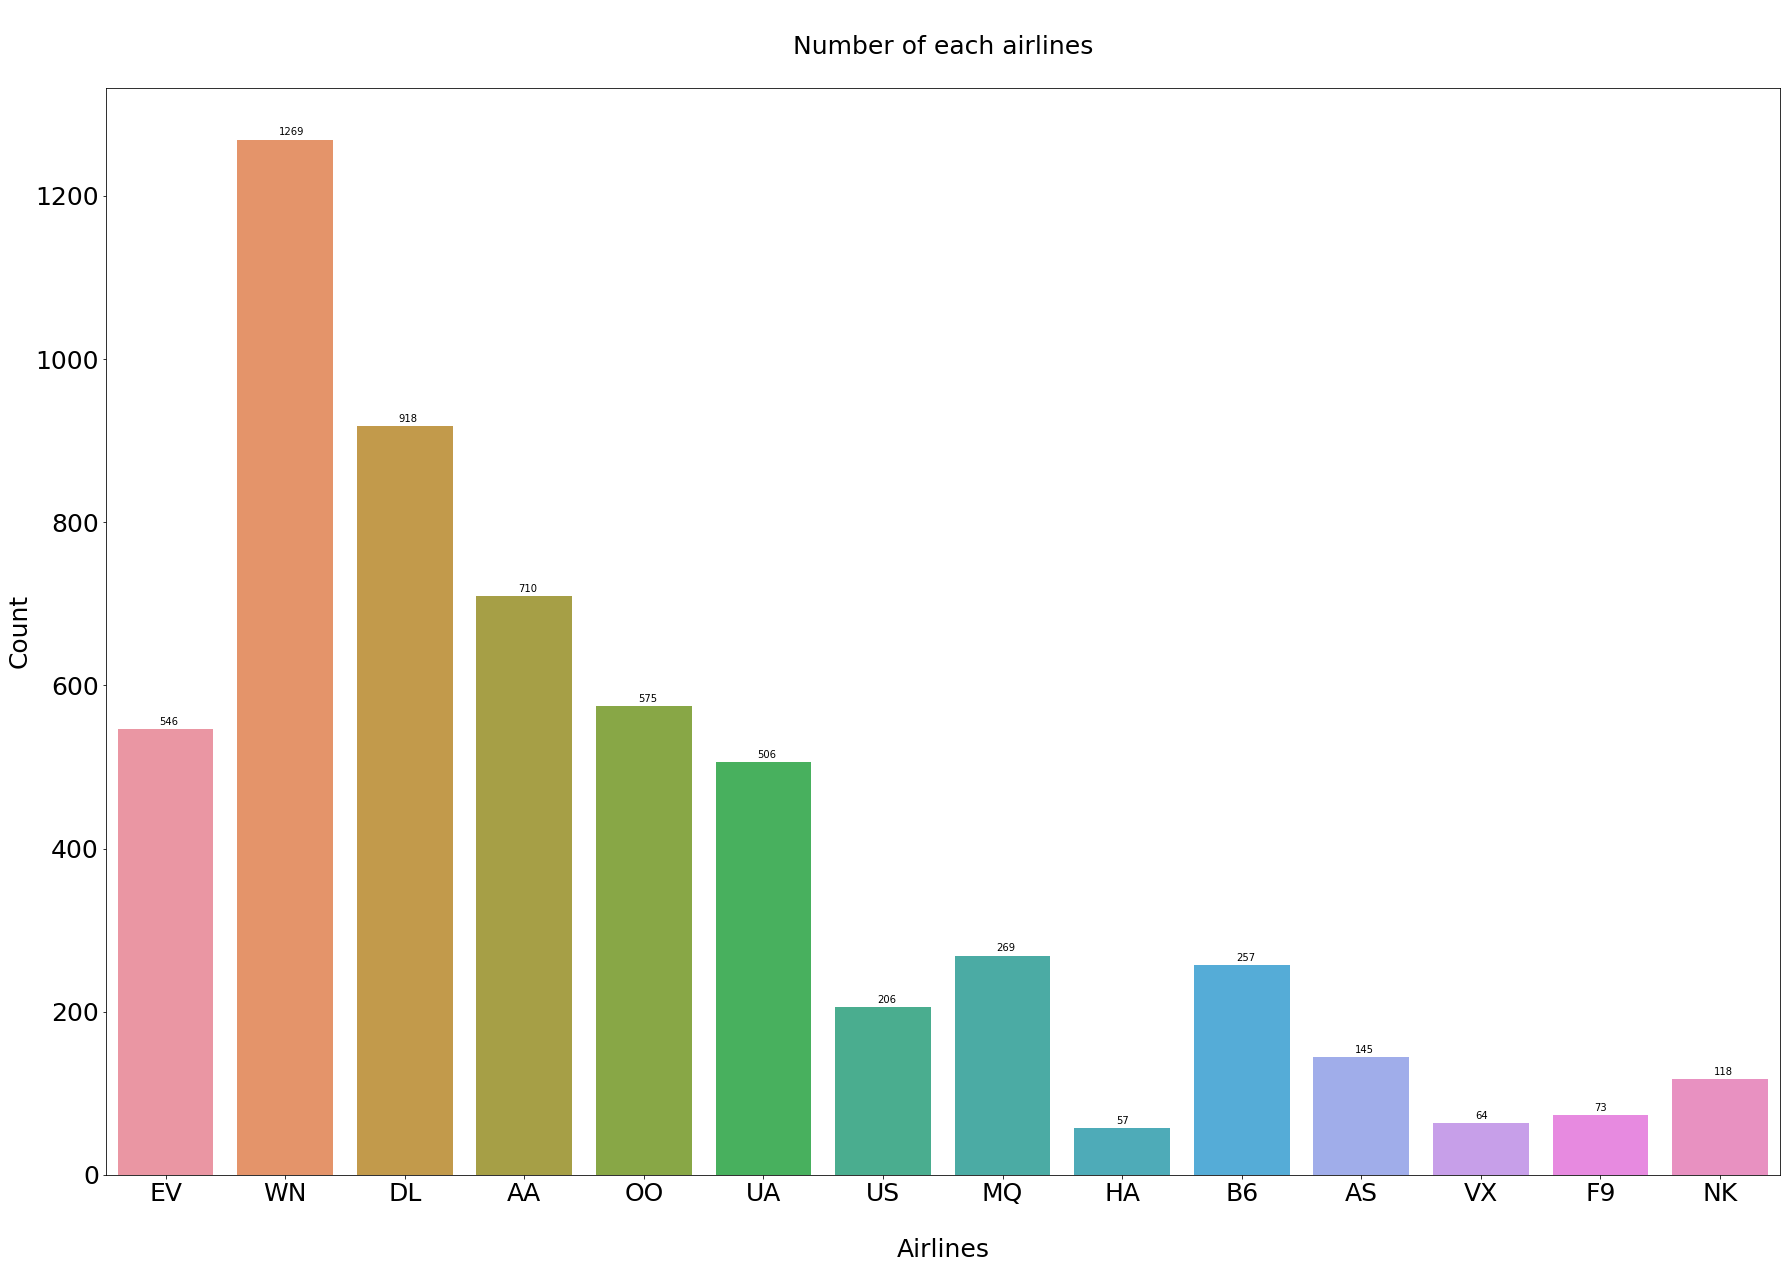

In [16]:
plt.figure(figsize=(30,20))# Creating an empty plot 
ax=sns.countplot(x=flight['AIRLINE'])# Countplot of airlines
plt.tick_params(labelsize=25)# changing the label sizes
plt.xlabel("\nAirlines" ,fontsize=25) # Adding x-label 
plt.ylabel("Count" ,fontsize=25) #Adding y-label
plt.title("\nNumber of each airlines\n",fontsize=25) # Adding plot title
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.35,p.get_height()+5)) # Adding the count above the bars
plt.show()

In [17]:
#Using melt() on arrival and departure delay to create one boxplot for both. Makes it easy to compare the two
flightmelt=flight[['AIRLINE','DEPARTURE_DELAY','ARRIVAL_DELAY']]
flightmelt=pd.melt(flightmelt,id_vars=['AIRLINE'],var_name=['ARRIVAL/DEPARTURE DELAY'],value_name='DELAY')
flightmelt.head() # Top 5 rows after melting

,AIRLINE,ARRIVAL/DEPARTURE DELAY,DELAY
0,EV,DEPARTURE_DELAY,-9.0
1,WN,DEPARTURE_DELAY,-6.0
2,EV,DEPARTURE_DELAY,1.0
3,DL,DEPARTURE_DELAY,0.0
4,DL,DEPARTURE_DELAY,-2.0


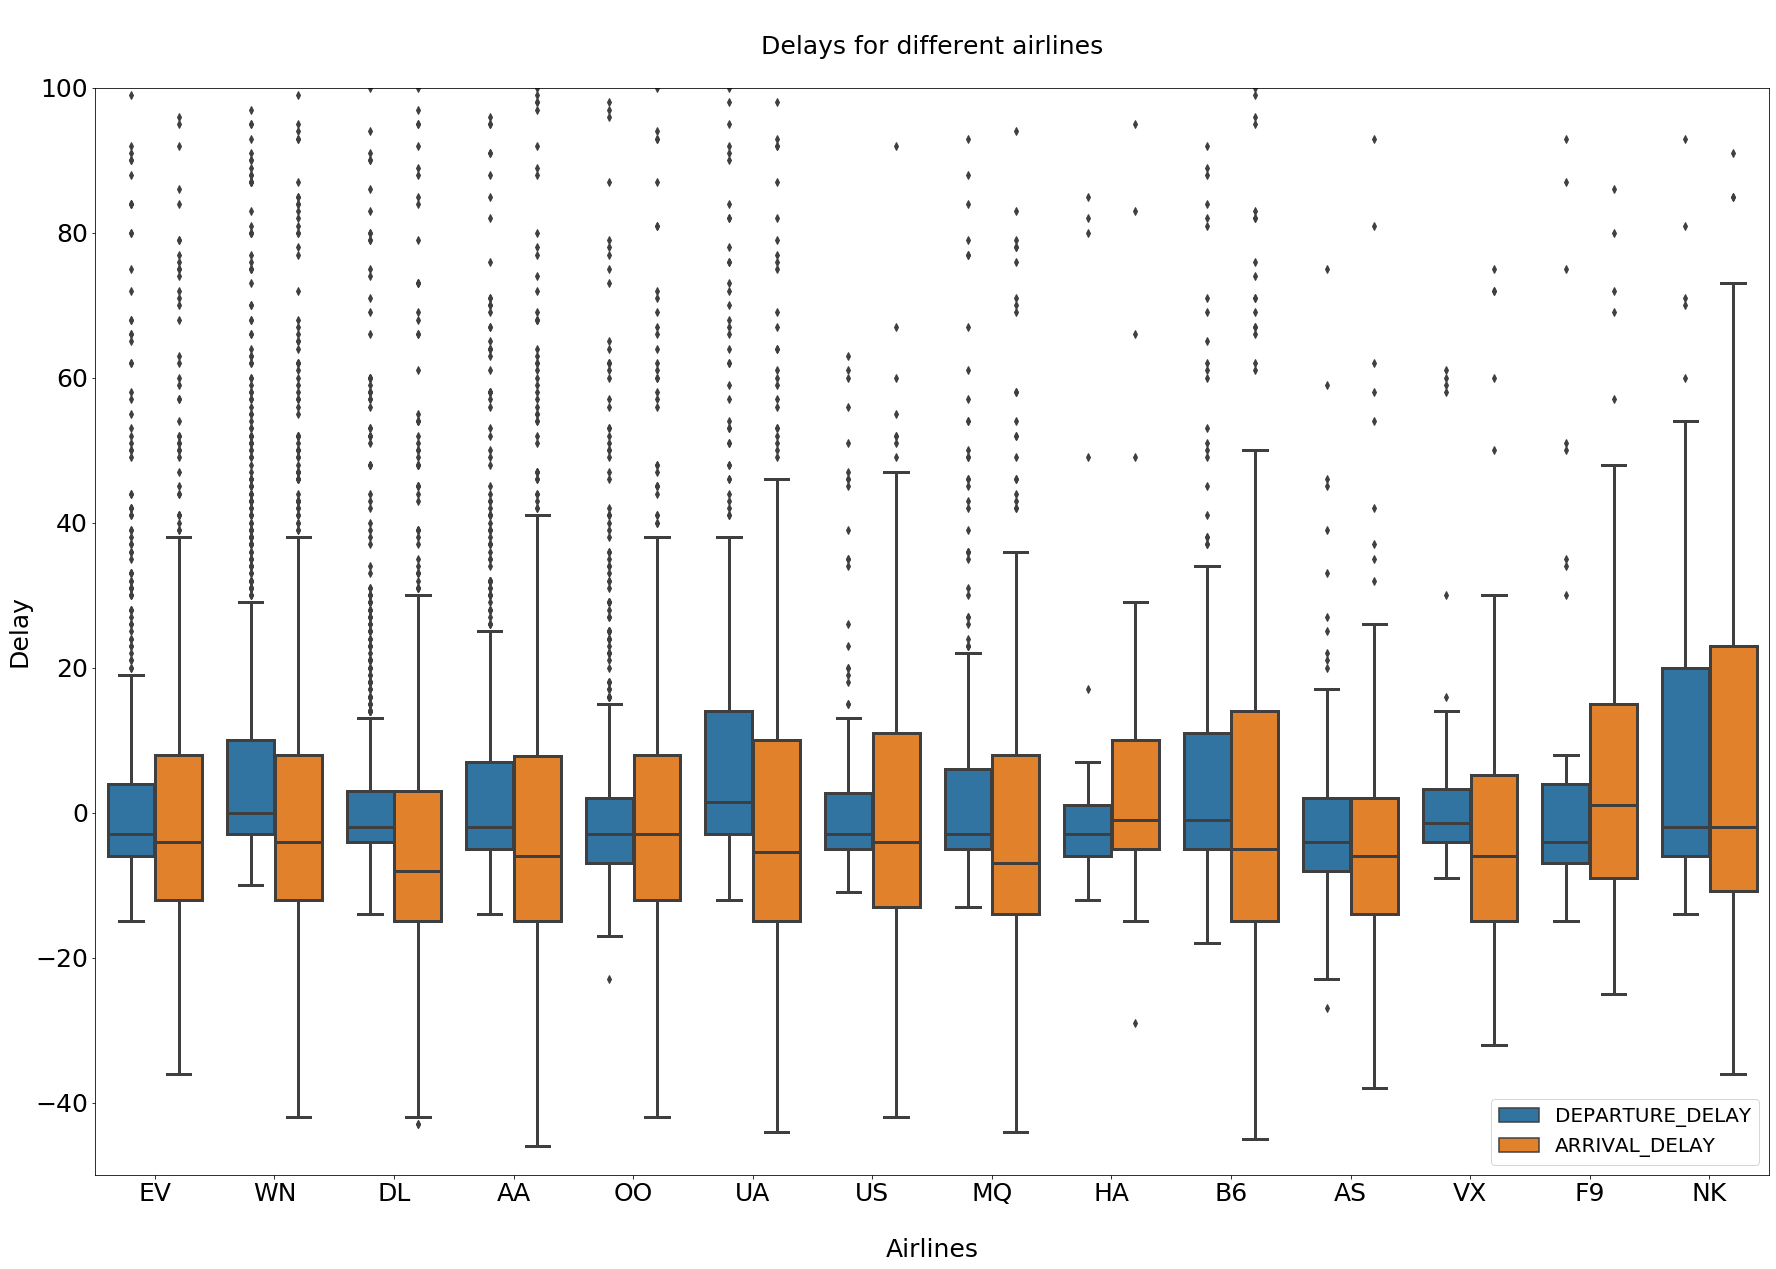

In [18]:
#Boxplot of arrival delays and departure delays group by the airlines
plt.figure(figsize=(30,20))
sns.boxplot(x=flightmelt['AIRLINE'],y=flightmelt['DELAY'],hue=flightmelt['ARRIVAL/DEPARTURE DELAY'],linewidth=3,fliersize=5)# using the melted dataframe instead of the original dataframe
plt.tick_params(labelsize=25)
plt.xlabel("\nAirlines" ,fontsize=25)
plt.ylabel("Delay" ,fontsize=25)
plt.legend(fontsize=20)
plt.ylim(-50,100,10) #To get better visibilit of the IQR, we limit the yaxis to 100.We will compropmise on few outliers.
plt.title("\nDelays for different airlines\n",fontsize=25)
plt.show()

In [19]:
#Departure delay summary grouped by airlines
depart_airline_5=flight.groupby('AIRLINE')['DEPARTURE_DELAY'].describe()
depart_airline_5=depart_airline_5[['mean','count','min','25%','50%','75%','max']] #Adding only the information I need to the dataframe
depart_airline_5=depart_airline_5.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'}) # renaming few column names
depart_airline_5=depart_airline_5.sort_values(by='Median',ascending=False) #Rearranging in descending order of median
print("\nDEPARTURE DELAY SUMMARY BASED ON AIRLINES: ")
depart_airline_5


DEPARTURE DELAY SUMMARY BASED ON AIRLINES: 


,mean,count,Min,Q1,Median,Q3,Max
AIRLINE,,,,,,,
UA,13.851779,506.0,-12.0,-3.0,1.5,14.00,332.0
WN,9.894405,1269.0,-10.0,-3.0,0.0,10.00,224.0
B6,13.645914,257.0,-18.0,-5.0,-1.0,11.00,330.0
VX,8.593750,64.0,-9.0,-4.0,-1.5,3.25,230.0
AA,8.349296,710.0,-14.0,-5.0,-2.0,7.00,289.0
DL,7.238562,918.0,-14.0,-4.0,-2.0,3.00,419.0
NK,15.228814,118.0,-14.0,-6.0,-2.0,20.00,353.0
EV,7.461538,546.0,-15.0,-6.0,-3.0,4.00,382.0
HA,7.964912,57.0,-12.0,-6.0,-3.0,1.00,202.0


In [20]:
#Arrival delay summary grouped by airlines
arr_airline_5=flight.groupby('AIRLINE')['ARRIVAL_DELAY'].describe()
arr_airline_5=arr_airline_5[['mean','count','min','25%','50%','75%','max']]  #Adding only the information I need to the dataframe
arr_airline_5=arr_airline_5.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'}) # renaming few column names
arr_airline_5=arr_airline_5.sort_values(by='Median',ascending=False) #Rearranging in descending order of median
print("\nARRIVAL DELAY SUMMARY BASED ON AIRLINE : ")
arr_airline_5


ARRIVAL DELAY SUMMARY BASED ON AIRLINE : 


,mean,count,Min,Q1,Median,Q3,Max
AIRLINE,,,,,,,
F9,19.150685,73.0,-25.0,-9.00,1.0,15.00,644.0
HA,10.894737,57.0,-29.0,-5.00,-1.0,10.00,194.0
NK,14.881356,118.0,-36.0,-10.75,-2.0,23.00,354.0
OO,4.269565,575.0,-42.0,-12.00,-3.0,8.00,304.0
EV,5.686813,546.0,-36.0,-12.00,-4.0,8.00,386.0
US,5.067961,206.0,-42.0,-13.00,-4.0,11.00,334.0
WN,3.422380,1269.0,-53.0,-12.00,-4.0,8.00,273.0
B6,9.653696,257.0,-45.0,-15.00,-5.0,14.00,339.0
UA,4.693676,506.0,-53.0,-15.00,-5.5,10.00,337.0


The boxplot details the departure and arrival delay for each airline. We can make several inferences from the above boxplot- (1) The median for both departure and arrival delay for most of the airlines is negative, which means most of the flights reach or depart early , which is a good thing. (2) There are many outliers for both the delays, which mean that the high outlier delays are not that common and it could happen due to some unexpected reason (we don’t know for sure). (3) Frontier Airlines Inc.(F9) has high average departure and arrival delay and didn’t have many flights (count is 73) in 2015.The maximum departure delay was also by F9, which is 650 minutes (an outlier). This value could have skewed the graph increasing the mean.                       

#### 3.3.  Departure and arrival delay based on airports

In [21]:
#Departure delay summary grouped by airports
depart_airport=flight.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].describe()
depart_airport=depart_airport[['mean','count','min','25%','50%','75%','max']]
depart_airport=depart_airport.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})# renaming few column names
depart_airport=depart_airport.sort_values(by='mean',ascending=False)
depart_airport=depart_airport.head(10) #We will only need the top 10 rows of our dataset for airports with high departure delay
print("\nDEPARTURE DELAY SUMMARY GROUPEDBY AIRPORT : ")
depart_airport


DEPARTURE DELAY SUMMARY GROUPEDBY AIRPORT : 


,mean,count,Min,Q1,Median,Q3,Max
ORIGIN_AIRPORT,,,,,,,
FAR,161.000000,1.0,161.0,161.00,161.0,161.00,161.0
12898,119.000000,1.0,119.0,119.00,119.0,119.00,119.0
BMI,101.333333,3.0,-5.0,-3.50,-2.0,154.50,311.0
ERI,92.000000,1.0,92.0,92.00,92.0,92.00,92.0
MYR,88.000000,4.0,-6.0,-3.75,2.5,94.25,353.0
14576,88.000000,1.0,88.0,88.00,88.0,88.00,88.0
14696,88.000000,1.0,88.0,88.00,88.0,88.00,88.0
10157,87.500000,2.0,-3.0,42.25,87.5,132.75,178.0
12992,80.000000,1.0,80.0,80.00,80.0,80.00,80.0


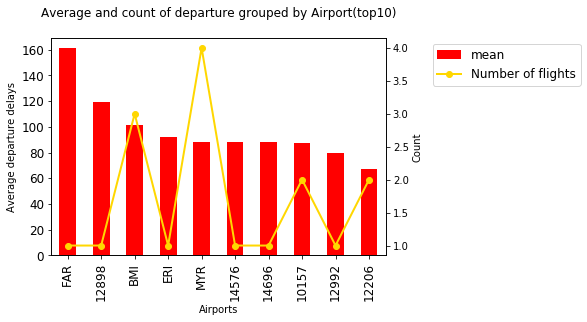

In [22]:
fig = plt.figure() #Creating an empty figure
ax = depart_airport['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False) # creating a plot of first y axis for mean
ax2 = ax.twinx() # A second y axis for "count"
ax2.plot(ax.get_xticks(),depart_airport['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of flights") #creating a plot for second y axis for count
ax.set_title("Average and count of departure grouped by Airport(top10)\n")
ax.set_xlabel("Airports")
ax.set_ylabel("Average departure delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels() #Adding legend for 1st y axis
lines2, labels2 = ax2.get_legend_handles_labels() #adding legend for 2nd y axis
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12) # positioning/sizing the legends
plt.show()

The above graph and table displays the top 10 airports with the highest average delays. One factor that the above airports have in common is that the number of flights departing from the airport is very few. Since the number of flights is very less, one late flight will increase the average delay. Hector International airport(FAR) seems like an unpopular airport with the highest average departure delay of 161 minutes but only one single flight.

#### 3.4 Departure and arrival delays based on distance

In [23]:
#Creating a dataframe for only the departure delays (positive values)
depart_delay_positive=flight[(flight['DEPARTURE_DELAY']>0) ]
depart_delay_positive['DEPARTURE_DELAY']

3        1.0
7       32.0
12      13.0
14      12.0
15       6.0
        ... 
5813    22.0
5814     4.0
5817    38.0
5818     8.0
5820     2.0
Name: DEPARTURE_DELAY, Length: 2115, dtype: float64

In [24]:
# Extracting departure delay and distance from flight dataset and sorting in descending order by distance first and then by departure delay 
depart_dist=flight[['DEPARTURE_DELAY','DISTANCE']].sort_values(by=['DISTANCE','DEPARTURE_DELAY'],ascending=False)
depart_dist.head(15) # Top 15 long distance flights

,DEPARTURE_DELAY,DISTANCE
2583,-7.0,4983
1529,-9.0,4983
3495,1.0,4817
1280,0.0,4817
1684,-3.0,4502
3511,23.0,3801
2820,19.0,3417
4522,5.0,3365
5762,8.0,3329
3969,25.0,3043


In [25]:
depart_dist.tail(15) # Top 15 short distance flights

,DEPARTURE_DELAY,DISTANCE
609,-3.0,73
557,0.0,69
5234,2.0,68
3473,0.0,68
1432,-8.0,68
5190,78.0,67
187,24.0,67
3695,15.0,67
2190,0.0,67
678,-9.0,67


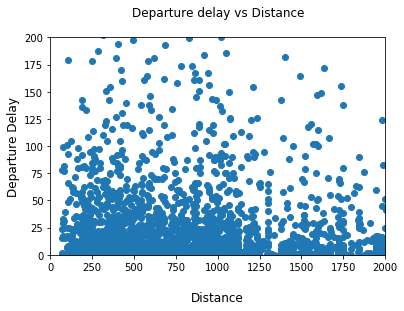

In [26]:
plt.scatter(x=flight['DISTANCE'],y=flight['DEPARTURE_DELAY']) #scatter plot between distance and departure delay
plt.xlim(0,2000,500) # Limiting x axis for better view of data points
plt.ylim(0,200,50) # Limiting y axis for better view of data points
plt.xlabel("\nDistance" ,fontsize=12)
plt.ylabel("Departure Delay" ,fontsize=12)
plt.title("Departure delay vs Distance\n")
plt.show()

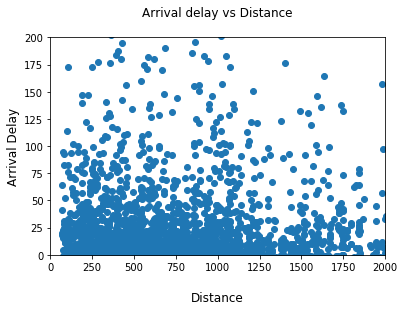

In [27]:
plt.scatter(x=flight['DISTANCE'],y=flight['ARRIVAL_DELAY']) #scatter plot between distance and arrival delay
plt.xlim(0,2000,500) # Limiting x axis for better view of data points
plt.ylim(0,200,50) # Limiting y axis for better view of data points
plt.xlabel("\nDistance" ,fontsize=12)
plt.ylabel("Arrival Delay" ,fontsize=12)
plt.title("Arrival delay vs Distance\n")
plt.show()

In [28]:
flight[['DEPARTURE_DELAY','ARRIVAL_DELAY','DISTANCE']].corr() #Correlation of distance, departure delay, arrival delay

,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
DEPARTURE_DELAY,1.000000,0.936069,0.023095
ARRIVAL_DELAY,0.936069,1.000000,-0.027935
DISTANCE,0.023095,-0.027935,1.000000


There is a significant amount of variability associated with arrival delay and distance as well as departure delay and distance. Distance doesn't seem like a good predictor of delay. There seems to very less correlation between departure delay and distance as well as arrival delay and distance 

In [29]:
# Top 10 long distance flights with departure delay(positive) and their corresponding arrival delay
depart_delay_positive[['DEPARTURE_DELAY','ARRIVAL_DELAY','DISTANCE']].sort_values(by='DISTANCE',ascending=False).head(10)

,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
3495,1.0,-18.0,4817
3511,23.0,10.0,3801
2820,19.0,48.0,3417
4522,5.0,-13.0,3365
5762,8.0,-19.0,3329
3969,25.0,26.0,3043
5814,4.0,-13.0,2979
5530,13.0,-6.0,2845
728,1.0,-38.0,2717
2513,4.0,-23.0,2704


In [30]:
# Top 10 shorty distance flights with departure delay(positive) and their corresponding arrival delay
depart_delay_positive[['DEPARTURE_DELAY','ARRIVAL_DELAY','DISTANCE']].sort_values(by='DISTANCE',ascending=False).tail(10)

,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
81,25.0,31.0,83
1053,17.0,15.0,74
3442,33.0,23.0,74
503,99.0,95.0,73
2818,1.0,-3.0,73
4062,29.0,17.0,73
5234,2.0,-8.0,68
5190,78.0,64.0,67
187,24.0,20.0,67
3695,15.0,18.0,67


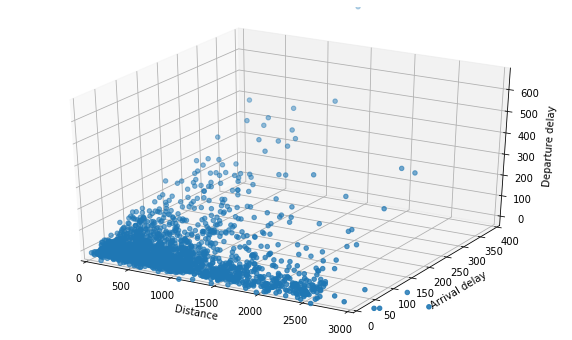

In [31]:
from mpl_toolkits.mplot3d import Axes3D # 3d plot
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(depart_delay_positive['DISTANCE'],depart_delay_positive['ARRIVAL_DELAY'],depart_delay_positive['DEPARTURE_DELAY'])
ax.set_xlabel('Distance')
ax.set_ylabel('Arrival delay')
ax.set_zlabel('Departure delay')
plt.xlim(0,3000,500)
plt.ylim(0,400,50)
plt.show()

Even though the distance is quite long, the distance doesn’t make up for the departure delay. This can be seen by the many arrival delays (positive values).


#### 3.5 Departure and arrival delays based on the day of the week

In [32]:
# Creating a dataframe to obtain the summary of departure delay grouped by day of week
depart_dow=flight.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].describe() 
depart_dow=depart_dow[['mean','count','min','25%','50%','75%','max']] # extracting the parameter we need
depart_dow=depart_dow.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'}) # Renaming them
print("\nDEPARTURE DELAY SUMMARY GROUPED BY DAY OF WEEK : ")
depart_dow


DEPARTURE DELAY SUMMARY GROUPED BY DAY OF WEEK : 


,mean,count,Min,Q1,Median,Q3,Max
DAY_OF_WEEK,,,,,,,
1,9.786826,835.0,-17.0,-5.0,-2.0,8.0,382.0
2,8.995006,801.0,-18.0,-5.0,-2.0,6.0,330.0
3,7.488971,816.0,-16.0,-5.0,-2.0,6.0,345.0
4,9.390443,858.0,-18.0,-4.0,-1.0,8.0,419.0
5,9.661148,906.0,-16.0,-4.0,-1.0,8.0,311.0
6,7.125894,699.0,-27.0,-5.0,-2.0,5.0,353.0
7,9.385965,798.0,-23.0,-5.0,-1.0,9.0,650.0


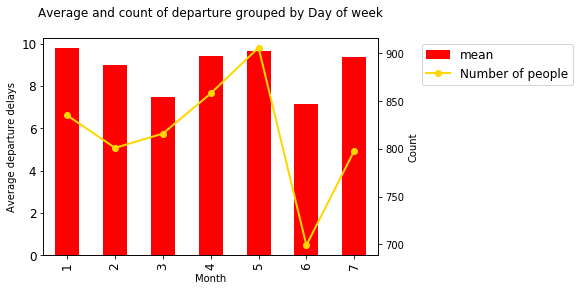

In [33]:
#Creating a plot with x as day of week, Y1 as mean and y2 a count
fig = plt.figure()
ax = depart_dow['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),depart_dow['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_title("Average and count of departure grouped by Day of week\n")
ax.set_xlabel("Month")
ax.set_ylabel("Average departure delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()

According to the above table and graph , the best day of the week to travel to experience least departure delay is Saturday-6 with a mean of 7.12. The highest departure delay is on Monday-1 with a mean of 9.7.

In [34]:
# Creating a dataframe to obtain the summary of arrival delay grouped by day of week
arr_dow=flight.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].describe()
arr_dow=arr_dow[['mean','count','min','25%','50%','75%','max']]
arr_dow=arr_dow.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})
print("\nARRIVAL DELAY SUMMARY GROUPED BY DAY OF WEEK : ")
arr_dow


ARRIVAL DELAY SUMMARY GROUPED BY DAY OF WEEK : 


,mean,count,Min,Q1,Median,Q3,Max
DAY_OF_WEEK,,,,,,,
1,5.104192,835.0,-44.0,-13.00,-5.0,7.0,386.0
2,3.863920,801.0,-43.0,-14.00,-6.0,8.0,339.0
3,2.458333,816.0,-55.0,-14.00,-6.0,8.0,334.0
4,5.627040,858.0,-42.0,-12.00,-4.5,10.0,412.0
5,4.716336,906.0,-45.0,-13.00,-5.0,9.0,304.0
6,1.133047,699.0,-53.0,-15.00,-6.0,4.0,354.0
7,4.422306,798.0,-53.0,-13.75,-5.0,9.0,644.0


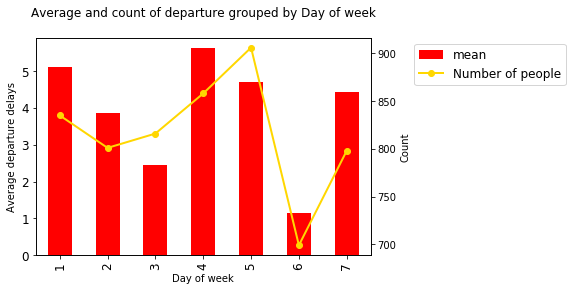

In [35]:
#Creating a plot with x as day of week, Y1 as mean and y2 a count
fig = plt.figure()
ax = arr_dow['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),depart_dow['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_title("Average and count of departure grouped by Day of week\n")
ax.set_xlabel("Day of week")
ax.set_ylabel("Average departure delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()

According to the above table and graph , the best day of the week to travel to experience least arrival delay is Saturday-6 with a mean of 1.13 minutes. The highest departure delay is on Thursday-4 with a mean of 5.62 minutes.

#### 3.6. Analysing the different delay types

In [36]:
#average of different delay types
delay_type=pd.DataFrame(flight['AIR_SYSTEM_DELAY'].describe())
delay_type['SECURITY_DELAY']=pd.DataFrame(flight['SECURITY_DELAY'].describe())
delay_type['AIRLINE_DELAY']=pd.DataFrame(flight['AIRLINE_DELAY'].describe())
delay_type['LATE_AIRCRAFT_DELAY']=pd.DataFrame(flight['LATE_AIRCRAFT_DELAY'].describe())
delay_type['WEATHER_DELAY']=pd.DataFrame(flight['WEATHER_DELAY'].describe())
delay_type=pd.DataFrame(delay_type.iloc[1])
delay_type

,mean
AIR_SYSTEM_DELAY,14.319963
SECURITY_DELAY,0.113806
AIRLINE_DELAY,18.119403
LATE_AIRCRAFT_DELAY,20.514925
WEATHER_DELAY,3.616604


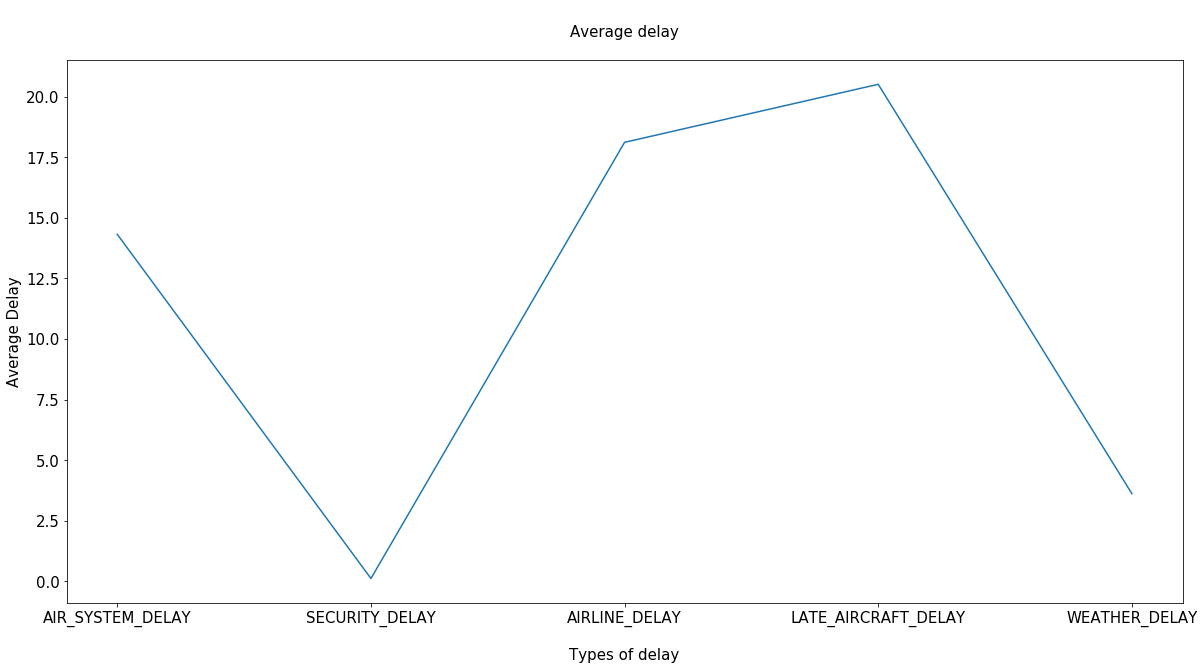

In [37]:
plt.figure(figsize=(20,10))
plt.plot(delay_type)
plt.tick_params(labelsize=15)
plt.xlabel("\nTypes of delay" ,fontsize=15)
plt.ylabel("Average Delay" ,fontsize=15)
plt.title("\nAverage delay\n",fontsize=15)
plt.show()

The highest delay is due to delay caused by the aircraft with an average of 20.51 minutes. Whereas, the least delay is caused due to security with an average of 0.11 minutes.

#### 3.7. Month vs Arrival delay 

In [38]:
# Creating a dataframe to obtain the summary of arrival delay grouped by month
arr_mon=flight.groupby('MONTH')['ARRIVAL_DELAY'].describe()
arr_mon=arr_mon[['mean','count','min','25%','50%','75%','max']]
arr_mon=arr_mon.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})
print("\nARRIVAL DELAY SUMMARY GROUPED BY MONTH : ")
arr_mon


ARRIVAL DELAY SUMMARY GROUPED BY MONTH : 


,mean,count,Min,Q1,Median,Q3,Max
MONTH,,,,,,,
1,2.663438,413.0,-40.0,-13.0,-5.0,7.0,395.0
2,5.921717,396.0,-42.0,-13.0,-4.0,9.0,292.0
3,7.189555,517.0,-53.0,-13.0,-4.0,11.0,412.0
4,2.601578,507.0,-45.0,-13.0,-6.0,7.0,334.0
5,5.843612,454.0,-36.0,-13.0,-4.0,10.0,226.0
6,8.571695,537.0,-55.0,-12.0,-3.0,12.0,312.0
7,7.605159,504.0,-36.0,-12.0,-3.0,13.0,644.0
8,6.121951,492.0,-44.0,-12.0,-4.0,8.0,354.0
9,-2.253165,474.0,-46.0,-16.0,-8.0,1.0,268.0


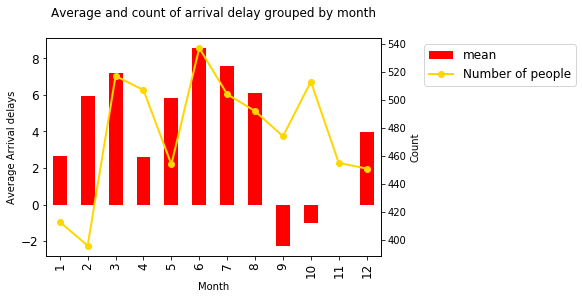

In [39]:
#Creating a plot with x as month, Y1 as mean and y2 a count
fig = plt.figure()
ax = arr_mon['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),arr_mon['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_title("Average and count of arrival delay grouped by month\n")
ax.set_xlabel("Month")
ax.set_ylabel("Average Arrival delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()

We analyze the arrival delay grouped month wise. It is interesting to note that, September (9), October (10) and November (11)   have a negative average arrival delay. This means that on those months on an average the flights have reached earlier than scheduled. The high average delay is on June (6) with a average delay of 8.57 minutes. We can make assumptions for why this is the case – (1) More number of people travel in the summer months as schools are off, so this can increase air-traffic or airports can be small to accommodate so many aircrafts or airlines may be short staffed. (2) A similar reason as to why there is negative delays in months -9,10,11, not many people are travelling, so fewer aircrafts, easier to handle and reduce delays. 

In [40]:
# Creating a dataframe to obtain the summary of departure delay grouped by month
depart_mon=flight.groupby('MONTH')['DEPARTURE_DELAY'].describe()
depart_mon=depart_mon[['mean','count','min','25%','50%','75%','max']]
depart_mon=depart_mon.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})
print("\nDEPARTURE DELAY SUMMARY GROUPED BY MONTH : ")
depart_mon


DEPARTURE DELAY SUMMARY GROUPED BY MONTH : 


,mean,count,Min,Q1,Median,Q3,Max
MONTH,,,,,,,
1,7.532688,413.0,-18.0,-5.00,-1.0,8.00,378.0
2,9.603535,396.0,-15.0,-5.00,-1.0,8.00,303.0
3,12.353965,517.0,-16.0,-4.00,-1.0,12.00,419.0
4,7.252465,507.0,-23.0,-5.00,-2.0,7.00,345.0
5,10.544053,454.0,-15.0,-5.00,-1.0,9.75,212.0
6,11.832402,537.0,-14.0,-4.00,-1.0,10.00,322.0
7,12.644841,504.0,-18.0,-4.00,0.0,13.00,650.0
8,10.008130,492.0,-18.0,-4.25,-1.0,7.00,353.0
9,4.854430,474.0,-23.0,-6.00,-3.0,1.00,289.0


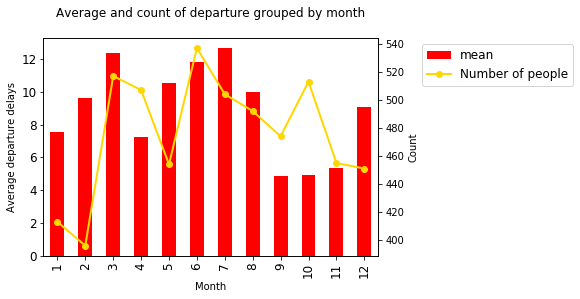

In [41]:
#Creating a plot with x as month, Y1 as mean and y2 a count
fig = plt.figure()
ax = depart_mon['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),arr_mon['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_title("Average and count of departure grouped by month\n")
ax.set_xlabel("Month")
ax.set_ylabel("Average departure delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()

#### 4 Regression Analysis

#### 4.1 Subpart 1

###### Response variable is ARRIVAL_DELAY

In [42]:
flight.dropna(subset=["WEATHER_DELAY"],how="all",inplace=True) #removing the missing values in WEATHER_DELAY


In [43]:
flight.isnull().sum() #the remaining null values

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER               0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME            0
DEPARTURE_DELAY           0
TAXI_OUT                  0
WHEELS_OFF                0
SCHEDULED_TIME            0
ELAPSED_TIME              0
AIR_TIME                  0
DISTANCE                  0
WHEELS_ON                 0
TAXI_IN                   0
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME              0
ARRIVAL_DELAY             0
DIVERTED                  0
CANCELLED                 0
CANCELLATION_REASON    1072
AIR_SYSTEM_DELAY          0
SECURITY_DELAY            0
AIRLINE_DELAY             0
LATE_AIRCRAFT_DELAY       0
WEATHER_DELAY             0
dtype: int64

In [44]:
Airline_dummy=pd.get_dummies(flight['AIRLINE'],prefix='Airline') #Geting dummy variables for "Airline" and prefixing it with airline for clarity
del Airline_dummy['Airline_AA'] #droping the first column of Airline "AA"
dayweek_dummy=pd.get_dummies(flight['DAY_OF_WEEK'],prefix='Dayofweek') #Geting dummy variables for "Day of week" and prefixing it with Dayofweek for clarity
del dayweek_dummy['Dayofweek_1'] #droping the first column of dayofweek "1"
flight=pd.concat([flight,Airline_dummy,dayweek_dummy],axis=1) #Adding the dummy variables to the original dataset
flight.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,Airline_UA,Airline_US,Airline_VX,Airline_WN,Dayofweek_2,Dayofweek_3,Dayofweek_4,Dayofweek_5,Dayofweek_6,Dayofweek_7
7,2015,1,1,4,OO,5354,N472CA,ORD,MBS,1317,...,0,0,0,0,0,0,1,0,0,0
9,2015,1,1,4,UA,1062,N73291,DCA,DEN,1603,...,1,0,0,0,0,0,1,0,0,0
19,2015,1,2,5,US,2065,N534UW,CLT,IAH,1120,...,0,1,0,0,0,0,0,1,0,0
21,2015,1,2,5,OO,5211,N943SW,IDA,DEN,1338,...,0,0,0,0,0,0,0,1,0,0
22,2015,1,2,5,HA,335,N477HA,OGG,HNL,1503,...,0,0,0,0,0,0,0,1,0,0


In [45]:
X_cat_1=flight.iloc[:,31:] # Adding only the categorical dummy variables 
X_num_1=flight[['LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','AIR_SYSTEM_DELAY','WEATHER_DELAY','DEPARTURE_TIME','DEPARTURE_DELAY','DISTANCE']]#Adding only the nuermical variables
X_1=pd.concat([X_num_1,X_cat_1],axis=1) #Combining them
X_1.head() #the final predictor variabes for the model

,LATE_AIRCRAFT_DELAY,AIRLINE_DELAY,AIR_SYSTEM_DELAY,WEATHER_DELAY,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,Airline_AS,Airline_B6,Airline_DL,...,Airline_UA,Airline_US,Airline_VX,Airline_WN,Dayofweek_2,Dayofweek_3,Dayofweek_4,Dayofweek_5,Dayofweek_6,Dayofweek_7
7,21.0,11.0,4.0,0.0,1349.0,32.0,222,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0.0,0.0,23.0,0.0,1603.0,0.0,1476,0,0,0,...,1,0,0,0,0,0,1,0,0,0
19,0.0,8.0,13.0,0.0,1128.0,8.0,912,0,0,0,...,0,1,0,0,0,0,0,1,0,0
21,50.0,0.0,31.0,0.0,1428.0,50.0,458,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22,89.0,25.0,0.0,0.0,1644.0,101.0,100,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
y_1=flight['ARRIVAL_DELAY'] #response variable for the model

In [47]:
#Linear regression using statsmodel
X_con_1=sm.add_constant(X_1)
arr_del_stats_1=sm.OLS(y_1,X_con_1).fit()
arr_del_stats_1.summary()

C:\Users\dira9\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.273e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:37:12   Log-Likelihood:                -2140.7
No. Observations:                1072   AIC:                             4335.
Df Residuals:                    1045   BIC:                             4470.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5743      0.300      1.916      0.056      -0.014       1.163
LATE_AIRCRAFT_DELAY     0.9814      0.004    251.351      0.000       0.974       0.989
AIRLINE_DELAY           0.9820      0.004    258.523      0.000       0.975       0.989
AIR_SYSTEM_DELAY        0.9853      0.003    311.685      0.000       0.979       0.992
WEATHER_DELAY           0.9846      0.004    239.180      0.000       0.977       0.993
DEPARTURE_TIME         -0.0001      0.000     -0.923      0.356      -0.000       0.000
DEPARTURE_DELAY         0.0158      0.003      4.647      0.000       0.009       0.023
DISTANCE                0.0001      0.000      1.106      0.269   -8.74e-05       0.000
Airline_AS              1.8908      0.434      4.354      0.000       1.039       2.743
Airline_B6              0.0009      0.277      0.003      0.997      -0.542       0.544
Airline_DL             -0.2385      0.224     -1.062      0.288      -0.679       0.202
Airline_EV             -0.1519      0.241     -0.629      0.529      -0.625       0.322
Airline_F9              0.0010      0.445      0.002      0.998      -0.872       0.874
Airline_HA             -0.1183      0.548     -0.216      0.829      -1.194       0.957
Airline_MQ             -0.1080      0.295     -0.366      0.715      -0.687       0.471
Airline_NK              0.4677      0.333      1.404      0.161      -0.186       1.122
Airline_OO             -0.1077      0.241     -0.448      0.654      -0.580       0.364
Airline_UA             -0.3509      0.233     -1.505      0.133      -0.808       0.107
Airline_US             -0.1699      0.319     -0.533      0.594      -0.796       0.456
Airline_VX             -0.1395      0.546     -0.256      0.798      -1.210       0.931
Airline_WN             -0.1731      0.199     -0.870      0.384      -0.563       0.217
Dayofweek_2            -0.2517      0.207     -1.214      0.225      -0.659       0.155
Dayofweek_3             0.0896      0.208      0.431      0.667      -0.319       0.498
Dayofweek_4            -0.2768      0.197     -1.404      0.161      -0.664       0.110
Dayofweek_5            -0.2329      0.198     -1.175      0.240      -0.622       0.156
Dayofweek_6            -0.2907      0.238     -1.222      0.222      -0.757       0.176
Dayofweek_7            -0.1769      0.206     -0.859      0.390      -0.581       0.227
==============================================================================
Omnibus:                     2216.606   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4284200.685
Skew:                          16.511   Prob(JB):                         0.00
Kurtosis:                     310.936   Cond. No.                     2.21e+04
================================================

In [48]:
# Extracting only thecoefficient and p-values from the model
arr_del_stats_1p=pd.DataFrame(arr_del_stats_1.params) 
arr_del_stats_1p.columns=['Coef']
arr_del_stats_1p['p-values']=arr_del_stats_1.pvalues
arr_del_stats_1p

,Coef,p-values
const,0.574268,0.055692
LATE_AIRCRAFT_DELAY,0.981362,0.000000
AIRLINE_DELAY,0.982036,0.000000
AIR_SYSTEM_DELAY,0.985325,0.000000
WEATHER_DELAY,0.984608,0.000000
DEPARTURE_TIME,-0.000107,0.356129
DEPARTURE_DELAY,0.015849,0.000004
DISTANCE,0.000113,0.269123
Airline_AS,1.890803,0.000015
Airline_B6,0.000871,0.997490


In [49]:
print("\nR-squared: {}% ".format(arr_del_stats_1.rsquared*100)) #R-squared of the model


R-squared: 99.90602987866627% 


#### 4.1.1. Interpretations
With everything else constant, one minute increase in late aircraft delay, increases arrival delay by 0.981362 minutes

With everything else fixed,  one minute increase in airline delay, increases arrival delay by 0.982036 minutes

As the p values of departure time, airlines and day of week are really high, we will not interpret any of those results, as it might not reveal the truth.

#### 4.1.2 Model diagnostics

 

In [50]:
y_hat_1=arr_del_stats_1.fittedvalues # obtaining the fitted values
y_minus_yhat_1=arr_del_stats_1.resid #obtaining the residual values


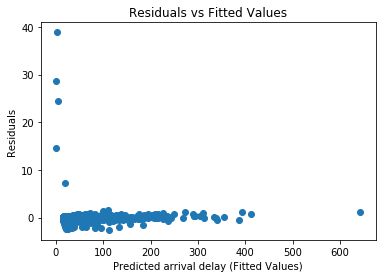

In [51]:
#scatter plot for residual vs fitted values 
plt.scatter(y_hat_1,y_minus_yhat_1)
plt.xlabel('Predicted arrival delay (Fitted Values)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

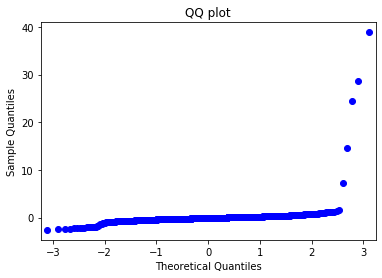

In [52]:
#QQ plot
qq = sm.qqplot(arr_del_stats_1.resid)
plt.title("QQ plot")
plt.show()

We will use Residual plots and QQplot for identifying the three potentisl problems in our dataset- Non-linearity, Non constant variance of the error terms,Non-Normality of error

•	The residuals then fall within a horizontal band centered around 0, but it displays slight tendencies to be positive. Hence, Linearity is not met. <br/>
•	Residual plot exhibits slight funnel shape, constant variance is not satisfied.<br/>
•	The points fall nowhere close to a straight line inthe qqplot . The distribution of the error terms departs substantially from a normal distribution. Normality is not satisfied


#### 4.2 Subpart II

{'whiskers': [<matplotlib.lines.Line2D at 0x257229eda88>,
 'caps': [<matplotlib.lines.Line2D at 0x25722c60148>,
 'boxes': [<matplotlib.lines.Line2D at 0x257229ed088>],
 'medians': [<matplotlib.lines.Line2D at 0x25722a4a148>],
 'fliers': [<matplotlib.lines.Line2D at 0x25722c45548>],
 'means': []}

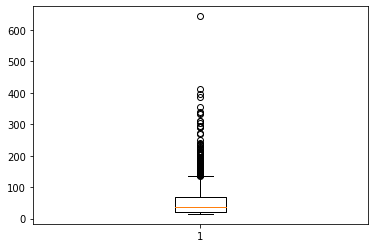

In [53]:
#analysing the outliers in arrival delay
plt.boxplot(flight['ARRIVAL_DELAY'])

In [54]:
Q1= flight['ARRIVAL_DELAY'].quantile(0.25) #Q1 region
Q3=flight['ARRIVAL_DELAY'].quantile(0.75) #Q2 region
IQR=Q3-Q1 #Inter quartile region

In [55]:
IQR

45.25

In [56]:
len(flight) # current number of observations in flight

1072

In [57]:
flight.drop(flight[ (flight['ARRIVAL_DELAY']>Q3+1.5*IQR) | (flight['ARRIVAL_DELAY']<Q1-1.5*IQR)].index,inplace=True) # dropping the outliers in arrival delay

In [58]:
len(flight) #  number of observations in flight after dropping the outliers

986

In [59]:
flight['log(y)'] = np.log(flight['ARRIVAL_DELAY'] +0.00001 ) # transforming the response variable (adding 0.000001 to avoid error incase a log 0 is present)

In [60]:
X_2=flight[['LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','AIR_SYSTEM_DELAY','WEATHER_DELAY','DEPARTURE_DELAY']] #predictor variable for the new model
y_2=flight['log(y)'] # response variable

In [61]:
#Linear regression using statsmodel
X_con_2=sm.add_constant(X_2)
arr_del_stats_2=sm.OLS(y_2,X_con_2).fit()
arr_del_stats_2.summary()

C:\Users\dira9\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log(y)   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     2161.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:37:13   Log-Likelihood:                 343.09
No. Observations:                 986   AIC:                            -674.2
Df Residuals:                     980   BIC:                            -644.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.7076      0.010    268.092      0.000       2.688       2.727
LATE_AIRCRAFT_DELAY     0.0191      0.000     40.192      0.000       0.018       0.020
AIRLINE_DELAY           0.0193      0.000     39.368      0.000       0.018       0.020
AIR_SYSTEM_DELAY        0.0203      0.000     58.918      0.000       0.020       0.021
WEATHER_DELAY           0.0195      0.001     28.038      0.000       0.018       0.021
DEPARTURE_DELAY         0.0009      0.000      2.234      0.026       0.000       0.002
==============================================================================
Omnibus:                       36.792   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.677
Skew:                          -0.367   Prob(JB):                     1.63e-11
Kurtosis:                       3.819   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Extracting only he pvalues and coefficients
arr_del_stats_2p=pd.DataFrame(arr_del_stats_2.params)
arr_del_stats_2p.columns=['Coef']
arr_del_stats_2p['p-values']=arr_del_stats_2.pvalues
arr_del_stats_2p

,Coef,p-values
const,2.707571,0.000000e+00
LATE_AIRCRAFT_DELAY,0.019111,1.781589e-209
AIRLINE_DELAY,0.019317,4.990089e-204
AIR_SYSTEM_DELAY,0.020272,0.000000e+00
WEATHER_DELAY,0.019478,1.745813e-127
DEPARTURE_DELAY,0.000854,2.570335e-02


In [63]:
print("\nR-squared: {}% ".format(arr_del_stats_2.rsquared*100)) #R-squared


R-squared: 91.68525991830104% 


In [64]:
#Regression line
print("Balance_Hat = {a} + {b}*LATE_AIRCRAFT_DELAY +{c} * AIRLINE_DELAY+ {d}*AIR_SYSTEM_DELAY+ {e}*WEATHER_DELAY +{f}*DEPARTURE_DELAY  " 
      .format(a=arr_del_stats_2.params[0],b=arr_del_stats_2.params[1], c=arr_del_stats_2.params[2], d=arr_del_stats_2.params[3], e=arr_del_stats_2.params[4], f=arr_del_stats_2.params[5]))

Balance_Hat = 2.70757128343479 + 0.019111162332402735*LATE_AIRCRAFT_DELAY +0.019317385511321186 * AIRLINE_DELAY+ 0.020272263585622848*AIR_SYSTEM_DELAY+ 0.019478108752049868*WEATHER_DELAY +0.0008544833163888557*DEPARTURE_DELAY  


In [65]:
y_hat_2=arr_del_stats_2.fittedvalues#obtaining the fitted values
y_minus_yhat_2=arr_del_stats_2.resid #obtaining the residual values

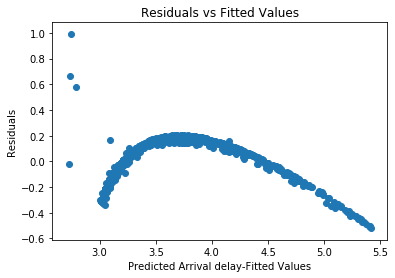

In [66]:
plt.scatter(y_hat_2,y_minus_yhat_2)
plt.xlabel('Predicted Arrival delay-Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

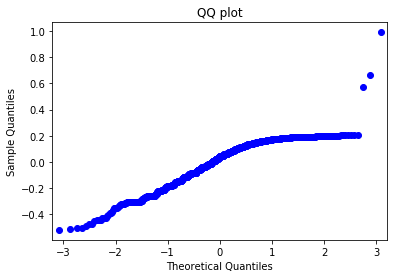

In [67]:
qq = sm.qqplot(arr_del_stats_2.resid)
plt.title("QQ plot")
plt.show()

#### 4.2.1 Model diagnostics

We will use Residual plots and QQplot for identifying the three potential problems in our dataset- Non-linearity, Non constant variance of the error terms,Non-Normality of error

•The residuals depart from zero in a systematic fashion, they are negative for smaller values, positive for medium values and negative again for larger values. This tendency indicates the lack of linearity and constant variance of the regression function. <br/>

•The points fall reasonably close to a straight line initially but the points quickly departs from normality. The distribution of the error terms  departs substantially from a normal distribution since the points are not in a straight line. Hence, normality is not satisfied

•No improvement from the previous model in sec 4.1. The normality improved slightly, but linearity and constant variance has gotten worse


#### 4.3. Suggestions on how to improve model fit

1)	Tukey's transformation - Performing multiple transformation, till linearity is achieved (at least max level possible) <br/>
2)	Suitable variable selection technique <br/>
3)	Adding interaction terms to the model <br/>
4)	Adding polynomial terms to the model
